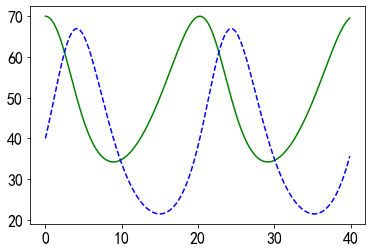

x(t)最小值为34.22935354285189，首次出现位置8.9，最大值为70.0，首次出现位置0.0
y(t)最小值为21.47713030734801，首次出现位置15.0，最大值为66.96312224968872，首次出现位置4.1


In [22]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def Pfun(y,t):
    y1,y2=y
    return np.array([0.2*y1-0.005*y1*y2,-0.5*y2+0.01*y1*y2])
t = np.arange(0,40,0.1)
sol1 = odeint(Pfun,[70,40],t)
plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.plot(t,sol1[:,0],'g-',t,sol1[:,1],'b--')
plt.show()
mi1 = min(sol1[:,0])
index1 = list(sol1[:,0]).index(mi1)
ma1 = max(sol1[:,0])
index2 = list(sol1[:,0]).index(ma1)
mi2 = min(sol1[:,1])
index3 = list(sol1[:,1]).index(mi2)
ma2 = max(sol1[:,1])
index4 = list(sol1[:,1]).index(ma2)
print('x(t)最小值为{}，首次出现位置{}，最大值为{}，首次出现位置{}'.format(mi1,index1/10,ma1,index2/10))
print('y(t)最小值为{}，首次出现位置{}，最大值为{}，首次出现位置{}'.format(mi2,index3/10,ma2,index4/10))

In [5]:
import numpy as np
from scipy.optimize import curve_fit
tt = np.linspace(0,8,9)
xt = np.array([5,5.9945,7.0932,8.2744,9.5073,10.7555,11.9804,13.1465,14.2247])
x0 = xt[0]
x = lambda t,r,xm: xm/(1+(xm/x0 - 1)*np.exp(-r*(t-tt[0])))
popt,pcov = curve_fit(x,tt,xt)
print(popt)
print('t=9的预测值是：',x(9,*popt))
print('t=10的预测值是：',x(10,*popt))

[ 0.24999834 20.00017025]
t=9的预测值是： 15.195319162817874
t=10的预测值是： 16.048127932234305


[[0.19073636]
 [0.00482605]
 [0.48288662]
 [0.00953575]]


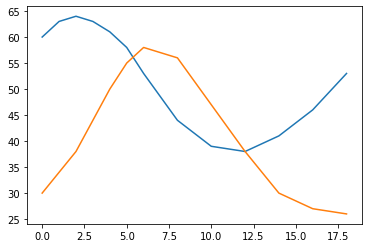

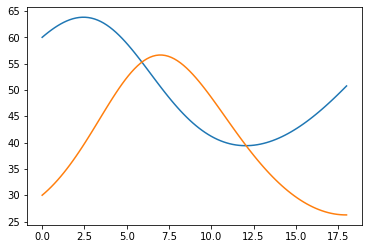

In [80]:
from numpy.linalg import pinv
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
t = np.array([0,1,2,3,4,5,6,8,10,12,14,16,18])
xt = np.array([60,63,64,63,61,58,53,44,39,38,41,46,53])
yt = np.array([30,34,38,44,50,55,58,56,47,38,30,27,26])
dt = np.diff(t)
dx = np.diff(xt)
dy = np.diff(yt)
t = t.reshape(13,1)
xt = xt.reshape(13,1)
yt = yt.reshape(13,1)
xt1 = xt[0:len(xt)-1]
yt1 = yt[0:len(yt)-1]
temp = xt1*yt1
z = np.zeros((12,2))
mat1 = np.c_[xt1,-temp]
mat1= np.c_[mat1,z]
mat2 = np.c_[z,-yt1]
mat2 = np.c_[mat2,temp]
mat = np.r_[mat1,mat2]
const=np.r_[[dx/dt],[dy/dt]].reshape(-1,1)
res = pinv(mat).dot(const)
print(res)
tt = np.linspace(0,18,100)
plt.plot(t,xt,t,yt)
plt.show()
def Pfun(y,t):
    y1,y2=y
    return np.array([res[0,0]*y1-res[1,0]*y1*y2,-res[2,0]*y2+res[3,0]*y1*y2])
sol1 = odeint(Pfun,[60,30],tt)
plt.plot(tt,sol1[:,0],tt,sol1[:,1])